In [2]:
#Binary Classifier to predict image is 5 or not
from sklearn.datasets import fetch_openml

In [3]:
mnist= fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [4]:
mnist

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [5]:
type(mnist)

tuple

In [6]:
X,y=mnist[0],mnist[1]

In [7]:
type(X)

numpy.ndarray

In [19]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit=X[3000]
some_digit_image=some_digit.reshape(28,28)

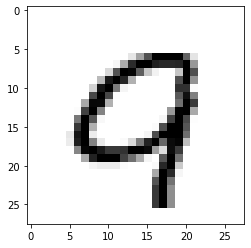

In [11]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")

In [22]:
y[3000]

'9'

In [23]:
#Measuring accuracy using cross-validation
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(56000, 784)

In [26]:
y_train_5 = (y_train=='5')
y_test_5 = (y_test=='5')

In [27]:
y_train_5

array([ True, False, False, ..., False, False, False])

In [28]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit( X_train, y_train_5)

SGDClassifier(random_state=42)

In [29]:
sgd_clf.predict([X_train[0]])

array([ True])

In [30]:
y_train_5[0]

True

In [31]:
#Implementing Cross validation
from sklearn.model_selection import cross_validate
cross_validate(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

{'fit_time': array([8.04951024, 7.69841599, 8.37259245]),
 'score_time': array([0.02693486, 0.02695894, 0.02792668]),
 'test_score': array([0.97192907, 0.96855413, 0.96024858])}

In [26]:
#accuracy is too high and thats called over-fitting
#we will use Confusion Matrix which is a much better way to evaluate performance

In [34]:
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_predict)

array([[50287,   673],
       [ 1180,  3860]], dtype=int64)

In [34]:
#A more concise matrix is to look at the accuracy of the positive predictions
#This is called the precision of the classifier
#this is also used with the recall of the classifier

In [35]:
from sklearn.metrics import precision_score,recall_score

In [36]:
#correct only 85% of the time
precision_score(y_train_5,y_train_predict)

0.8515332009706597

In [37]:
#detects only 76% of the 5s
recall_score(y_train_5,y_train_predict)

0.7658730158730159

In [38]:
#It is often convinient to combine these scores in a metric called F1
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.8064347644416588

In [39]:
#increasing precision reduces recall and vise versa